# Autoencoder 

# **AutoEncoder :**

1.Autoencoder is a type of neural network that can be used to learn a compressed representation of raw data.

2.An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. After training, the encoder model is saved and the decoder is discarded.
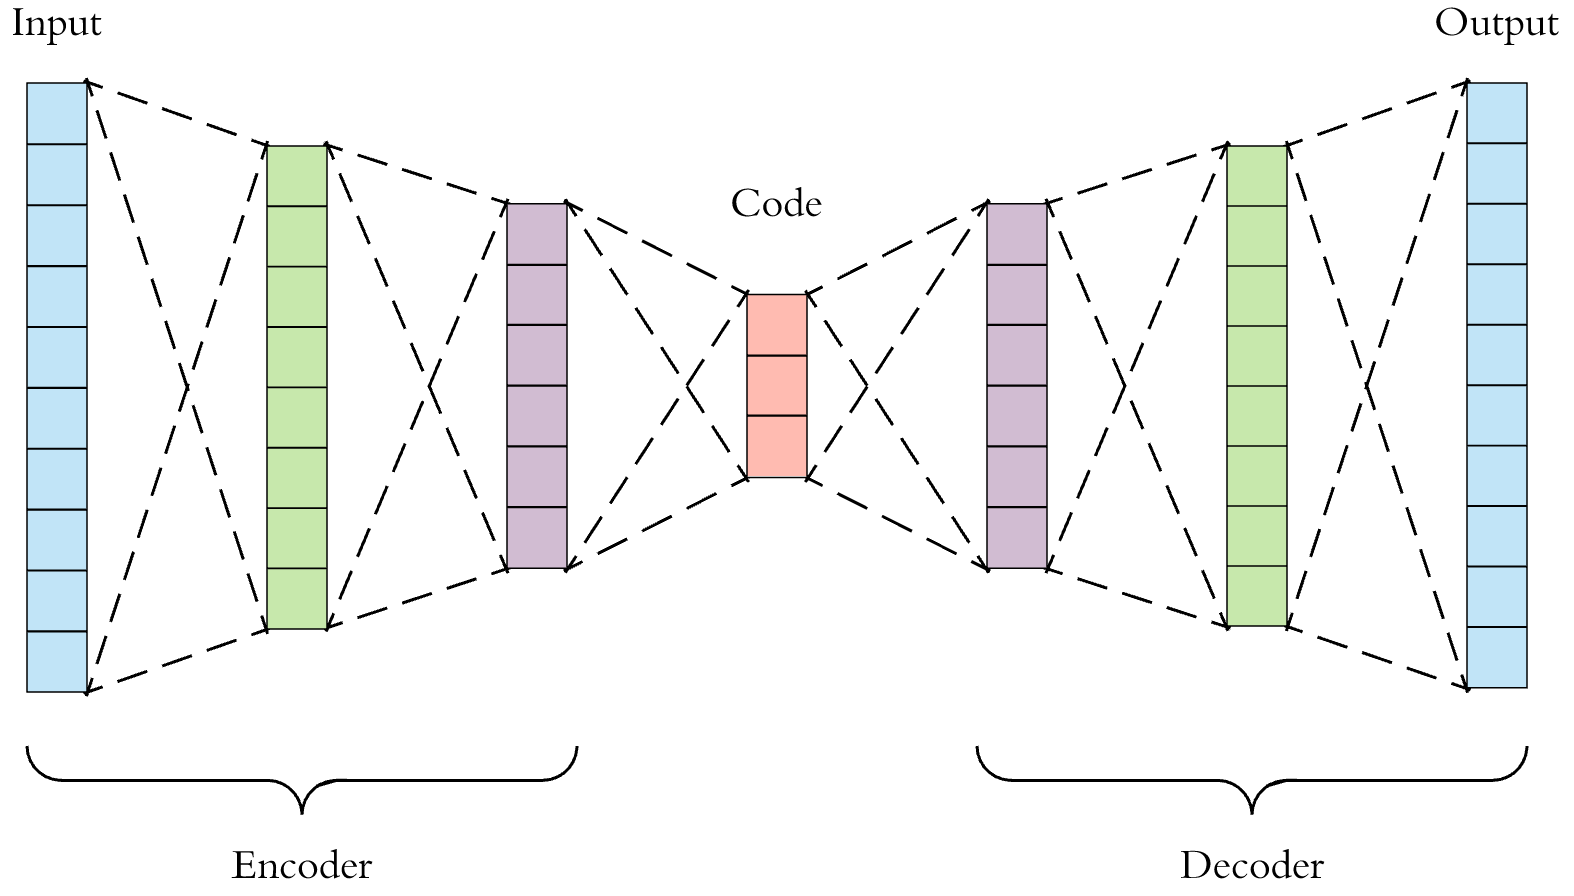

3.The encoder can then be used as a data preparation technique to perform feature extraction on raw data that can be used to train a different machine learning model.

In [ ]:
#Importing the Libraries
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from keras import layers
import keras
import pandas as pd

In [ ]:
df = pd.read_csv('Dataloader_Output.csv')
df =df.drop(columns='Date')
df

,Adj Close,Class,Vol,Vix,SMA_5,SMA_10,SMA_15,SMA_30,SMA_90,SMA_100,EMA_5,EMA_10,EMA_15,EMA_30,EMA_90,EMA_100,avg_5,avg_10,avg_15,avg_30,avg_90,avg_100,upper_band,mid_band,lower_band,RSI_5,RSI_10,RSI_15,RSI_30,RSI_90,RSI_100,ATR_14,ADX_14,ROC_12,Williams_14,momentum_5,momentum_10,momentum_15,FFT_100,ma7,ma21,10 Day ROI,20 Day ROI,30 Day ROI,MACD_12_26,SRSI_10,SRSI_14,SRSI_30,CCI,Hvol_10,Hvol_14,Hvol_30,Hvol_90,VWAP,slowk,slowd,Return,Ret_10,Std_10,Ret_15,Std_15,Ret_20,Std_20,Ret_25,Std_25,Ret_30,Std_30,Ret_35,Std_35,Ret_40,Std_40,Ret_45,Std_45,Ret_50,Std_50,Ret_55,Std_55,Ret_60,Std_60
0,6082.299805,False,130900,0.151025,6048.870020,6016.154980,6004.929980,5946.544987,5750.324995,5709.044995,6049.771814,6024.030449,6002.730690,5945.352819,5754.020799,5727.708910,45.480606,36.819954,27.516950,13.391807,4.538772,4.196491,6109.919900,5973.07251,5836.225120,71.660129,67.211705,65.544297,63.074335,57.954246,57.351815,56.564763,29.215561,1.211412,-7.837589,58.250000,93.899902,173.949707,6049.691809,6031.385672,5970.373814,0.015680,0.028041,0.025527,55.186115,0.652680,0.708980,0.605549,109.300100,10.732666,11.781361,10.912909,28.833713,6080.583333,83.360019,75.007459,0.002952,0.015740,0.006140,0.029323,0.006323,0.028106,0.006749,0.039194,0.006325,0.025747,0.006046,0.043829,0.005836,0.080860,0.006428,0.068788,0.006603,0.065262,0.006527,0.072186,0.006589,0.062930,0.006533
1,6048.500000,True,129000,0.151130,6047.250000,6020.834961,6014.489974,5951.248324,5759.467215,5715.319995,6049.347876,6028.479458,6008.451854,5952.007476,5760.492869,5734.061209,39.166635,35.870133,27.504537,13.507637,4.535330,4.190081,6110.855290,5983.11250,5855.369710,56.299287,59.914854,60.755191,60.796804,57.344489,56.819973,56.867266,29.112120,0.537721,-32.856192,-8.100098,46.799805,143.399902,6060.208213,6045.271415,5976.664295,0.007798,0.034338,0.023885,53.751292,0.568796,0.568649,0.593802,84.979737,10.943360,10.293710,10.905014,28.817833,6072.070989,75.448462,76.192885,-0.005557,0.007962,0.006530,0.024316,0.006592,0.034161,0.006252,0.028835,0.006443,0.024152,0.006096,0.028855,0.005768,0.072996,0.006538,0.072503,0.006487,0.056164,0.006590,0.078578,0.006405,0.063397,0.006524
2,6054.299805,False,137000,0.149610,6057.739941,6029.114941,6018.559961,5956.094987,5768.532769,5721.734492,6050.998519,6033.174067,6014.182848,5958.606981,5766.950164,5740.402567,33.064721,33.782448,26.975874,13.520416,4.524377,4.177788,6110.058302,5993.03999,5876.021679,58.220222,60.727746,61.275390,61.046483,57.422222,56.889266,56.280312,28.412713,1.100459,-29.247097,52.449707,82.799805,61.049805,6068.735712,6049.592843,5986.502372,0.013866,0.033907,0.024607,52.477256,0.635881,0.555748,0.597284,64.675473,10.898623,10.296461,10.960648,28.817119,6063.906049,66.831983,75.213488,0.000959,0.013953,0.006202,0.010347,0.005468,0.033743,0.006254,0.033485,0.006363,0.024857,0.006095,0.031328,0.005754,0.074159,0.006532,0.083576,0.006238,0.050887,0.006549,0.075643,0.006396,0.058568,0.006495
3,6019.350098,True,185200,0.149751,6053.769922,6034.184961,6019.216634,5960.113330,5776.057769,5727.774492,6040.449045,6030.660618,6014.828754,5962.525892,5772.497415,5745.926281,30.840463,31.111733,26.140216,13.465261,4.508356,4.161529,6109.059680,5998.72749,5888.395301,43.738298,53.467856,56.444759,58.715364,56.791559,56.338958,56.363840,27.365646,0.294082,-50.995555,-19.850098,50.700195,9.850098,6074.768665,6044.271415,5994.292852,0.008494,0.019261,0.020436,48.093037,0.573076,0.495563,0.570087,38.835230,10.695947,10.399809,10.621599,28.716127,6053.383687,41.381162,61.220536,-0.005773,0.008658,0.006594,0.001863,0.005679,0.019457,0.006249,0.021071,0.006417,0.020793,0.006198,0.022438,0.005849,0.066734,0.006642,0.078278,0.006332,0.048820,0.006585,0.065359,0.006453,0.057299,0.006515
4,6074.649902,False,147600,0.149816,6055.819922,6046.519971,6023.116634,5966.334993,5783.959988,5734.653989,6051.849331,6038.658669,6022.306398,5969.759699,5779.138129,5752.435659,24.853648,29.457529,25.646042,13.472632,4.498116,4.149895,6

In [ ]:
X = df.loc[:, df.columns != 'Class'].values
y = df['Class'].values
print(X.shape, y.shape)

(1210, 78) (1210,)


In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [ ]:
n_inputs = X.shape[1]
input_data_shape = keras.Input(shape=(n_inputs,))
encoded = layers.Dense(64, activation='relu')(input_data_shape)
encoded = layers.Dense(32, activation='relu')(encoded)

bottleneck = layers.Dense(16, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(bottleneck)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(n_inputs, activation='sigmoid')(decoded)

In [ ]:
model = keras.Model(input_data_shape, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                5056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 78)                5070

In [ ]:
model.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
4/4 [==============================] - 1s 116ms/step - loss: 0.6925 - val_loss: 0.6901
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6893 - val_loss: 0.6862
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6852 - val_loss: 0.6811
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6793 - val_loss: 0.6750
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6729 - val_loss: 0.6681
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6660 - val_loss: 0.6612
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6596 - val_loss: 0.6548
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6526 - val_loss: 0.6489
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6473 - val_loss: 0.6439
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6404 - val_loss: 0.6395
Epoch 11/100
4/4 [

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                5056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 78)                5070

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
#defining the autoencoder model
autoencoder = Model(inputs=input_data_shape, outputs=decoded)

In [ ]:
#Building a Base Model to compare the performance after compressing the data using Encoder model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#t = MinMaxScaler()
#t.fit(X_train)
#X_train = t.transform(X_train)
#X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.5625


In [ ]:
#Compressing the input data using Encoder Model and fitting it on the Logistic Regression model.

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression(max_iter=1000)
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.5475


##Calculating the difference in between the original and reconstructed dataframes

In [ ]:
X_train_decode = autoencoder.predict(X_train)
X_test_decode = autoencoder.predict(X_test)

In [ ]:
#for train
train_decode_df = pd.DataFrame(X_train_decode)
train_df = pd.DataFrame(X_train)

In [ ]:
percent_train =  (train_decode_df/train_df)*100

In [ ]:
diff_train =  train_df - train_decode_df

In [ ]:
percent_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,106.407137,177.328610,143.236028,103.360942,100.049791,113.928591,132.480290,166.390311,178.004896,103.144258,112.625319,116.425507,129.501371,140.708888,151.110799,172.972124,181.520494,178.076015,125.171728,130.015853,154.643112,137.976139,112.842348,121.491981,104.222557,103.357984,102.022892,100.983305,95.852497,100.432252,137.223487,176.850744,105.215535,96.749432,116.934490,102.034187,112.346238,106.188915,108.440109,118.588984,99.416991,79.412069,104.974013,100.038108,100.494184,103.050625,105.553755,102.630090,103.095303,112.578147,115.783705,120.892139,154.801302,92.804986,97.432507,106.713121,100.408697,122.990933,114.044279,125.400593,81.618446,115.562898,104.945060,104.639535,102.906519,107.524625,108.361495,115.721358,133.322266,120.427033,147.969097,116.970455,113.098867,115.286876,115.288432,116.853826,107.992845,115.601837
1,99.933795,113.178976,165.404646,100.986745,99.790630,102.799807,97.922459,101.896642,102.011169,99.612683,104.669750,103.832420,101.998459,105.658482,110.393682,168.199904,142.818246,127.110228,136.664188,77.971364,79.839193,102.010491,102.794016,98.531268,79.667405,91.622585,94.390828,95.844439,75.401709,69.600554,101.691146,136.571583,110.251488,89.317792,109.504677,82.406579,82.101383,97.092451,98.468465,104.235964,84.999497,111.916927,136.225185,126.572073,84.353501,86.491422,141.031483,84.302811,84.770119,91.330311,115.234101,186.775801,146.993729,119.635675,171.054094,80.147533,85.509990,61.013744,79.536818,73.809448,107.365190,77.505040,138.026782,84.602942,134.828203,93.681959,119.511893,104.004889,127.023779,124.815746,116.560357,145.088519,87.348830,135.648669,73.647201,147.776935,81.979024,139.567127
2,87.078634,71.262829,92.425828,81.609031,73.764058,92.126693,76.462559,359.219919,228.297280,81.052840,81.979526,84.426568,96.515943,138.374964,180.143452,96.097940,69.858525,56.359401,68.411494,143.390463,156.502905,98.235572,80.517000,91.831402,111.187964,100.054800,96.647341,90.831394,87.021567,92.403453,100.732113,58.757192,103.259267,101.508085,110.890941,106.723237,94.643765,71.329653,87.690164,78.445232,102.894542,103.432768,83.059601,90.678386,102.277207,80.743013,83.129848,109.951145,105.350980,109.339643,89.464661,69.001158,330.370622,93.216566,91.731040,126.061298,106.481968,118.085258,89.893844,145.473514,103.981353,142.566179,100.941903,104.534555,82.700522,104.153945,68.655100,83.418117,67.086895,81.366731,67.442855,80.965913,65.653614,77.427873,83.397422,78.103674,111.042365,74.391846
3,96.876496,94.916853,125.348320,97.207983,96.630059,95.937073,95.962254,97.201014,96.750031,97.780249,97.100753,97.529021,95.815866,97.477364,97.547973,78.126119,76.191882,93.834382,172.243141,95.892849,95.554999,95.755668,95.422420,94.186050,85.952802,92.696467,91.203107,94.707321,96.647585,92.562086,86.099402,90.077643,116.929054,111.015950,86.226505,112.106621,103.831868,102.385333,97.425479,95.463588,103.211053,87.877046,87.140670,101.302645,119.133629,129.235670,82.314043,101.084038,83.497891,91.214906,68.520997,43.734676,99.350537,74.284542,93.646002,87.041425,107.527726,79.932448,101.216550,86.832870,89.651006,90.679778,94.888526,108.603343,89.627082,93.372616,77.862568,94.122327,92.718445,74.519149,98.581737,72.993077,90.124574,73.704460,98.851238,71.147063,93.414095,54.931554
4,94.939224,93.233095,136.986220,99.024713,100.194881,102.730507,98.411746,102.961466,104.316036,101.877200,102.867843,102.755951,103.018005,102.808825,107.742744,139.808206,247.600421,185.240350,106.996153,84.337927,79.478953,105.290626,96.840981,100.233046,75.841722,75.938596,80.569456,82.388836,79.014423,76.215565,90.084638,196.472695,97.854718,457.854104,86.614565,75.569306,149.664926,100.215972,106.652804,102.055252,81.872441,100.279982,90.735682,118.212212,68.897195,158.307782,

In [ ]:
diff_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,-0.009120,-0.107929,-0.226071,-0.004083,-0.000057,-0.013751,-0.018152,-0.015563,-0.024601,-0.003999,-0.013828,-0.015834,-0.021124,-0.014257,-0.016327,-0.149719,-0.116887,-0.084122,-0.025020,-0.012472,-0.019700,-0.032543,-0.010563,-0.020714,-0.029778,-0.022152,-0.012455,-0.005107,0.019432,-0.002049,-0.111573,-0.085566,-0.030575,0.029034,-0.098709,-0.013614,-0.078850,-0.006909,-0.010481,-0.014413,0.003765,0.175934,-0.026390,-0.000252,-0.003638,-0.018516,-0.028079,-0.017882,-0.010920,-0.050447,-0.074588,-0.070050,-0.022730,0.059420,0.019626,-0.032315,-0.002697,-0.074277,-0.084517,-0.099776,0.157987,-0.065986,-0.029687,-0.023022,-0.016314,-0.039932,-0.041236,-0.078883,-0.138291,-0.104207,-0.175653,-0.092624,-0.059203,-0.088701,-0.069736,-0.098126,-0.039873,-0.086910
1,0.000379,-0.026159,-0.273333,-0.005493,0.001187,-0.015944,0.012022,-0.010438,-0.011030,0.002180,-0.026294,-0.021661,-0.011338,-0.030672,-0.055758,-0.087603,-0.043858,-0.034474,-0.077884,0.199636,0.188106,-0.011079,-0.015834,0.008512,0.118102,0.041619,0.026313,0.018313,0.145858,0.189118,-0.009180,-0.045345,-0.042553,0.061615,-0.046595,0.101615,0.127547,0.016039,0.008652,-0.024014,0.078111,-0.057257,-0.129686,-0.124845,0.090720,0.070737,-0.136588,0.083299,0.041412,0.027606,-0.046330,-0.152043,-0.183426,-0.070547,-0.178768,0.110955,0.078203,0.176307,0.131598,0.127591,-0.037059,0.100612,-0.141971,0.063083,-0.133974,0.024736,-0.077527,-0.015191,-0.108105,-0.085810,-0.069548,-0.145567,0.069499,-0.127994,0.170410,-0.159452,0.104473,-0.139626
2,0.022002,0.077844,0.067025,0.028066,0.037589,0.009642,0.019784,-0.024514,-0.027556,0.029781,0.024795,0.018975,0.002938,-0.011226,-0.021019,0.012068,0.073157,0.083927,0.037327,-0.020044,-0.023869,0.002004,0.020744,0.009479,-0.080060,-0.000402,0.023779,0.056261,0.066694,0.039061,-0.003342,0.082321,-0.020936,-0.013691,-0.071441,-0.046662,0.044297,0.043712,0.018581,0.022328,-0.019323,-0.024934,0.126767,0.075426,-0.018001,0.163826,0.118362,-0.068551,-0.016737,-0.038175,0.070595,0.184278,-0.037791,0.060076,0.071236,-0.109757,-0.044131,-0.057388,0.084366,-0.154847,-0.029431,-0.147922,-0.006556,-0.023422,0.133426,-0.025007,0.271006,0.125475,0.288041,0.154648,0.286920,0.166993,0.293774,0.217759,0.113940,0.215812,-0.057667,0.244913
3,0.030017,0.013568,-0.013863,0.026616,0.032544,0.040192,0.039916,0.027291,0.031598,0.021352,0.028101,0.024105,0.040937,0.024453,0.023740,0.064141,0.042423,0.007772,-0.079554,0.018046,0.019770,0.041457,0.045687,0.058067,0.092071,0.041692,0.050245,0.030030,0.023036,0.052711,0.049620,0.013083,-0.064745,-0.064806,0.096163,-0.056421,-0.021183,-0.020533,0.024529,0.045211,-0.014129,0.068712,0.071726,-0.007885,-0.090604,-0.103582,0.111941,-0.005338,0.021537,0.011946,0.032286,0.041400,0.006334,0.214116,0.041285,0.066488,-0.034384,0.031823,-0.006039,0.023232,0.060433,0.012781,0.026364,-0.008445,0.060326,0.006938,0.136854,0.005980,0.040916,0.029562,0.007416,0.036412,0.054883,0.037498,0.006109,0.028185,0.036265,0.046715
4,0.031309,0.015012,-0.168632,0.006081,-0.001252,-0.018013,0.010616,-0.018794,-0.027428,-0.011777,-0.018314,-0.017837,-0.019745,-0.017730,-0.048526,-0.081665,-0.080311,-0.062806,-0.016655,0.136695,0.189566,-0.035609,0.021185,-0.001542,0.050079,0.055831,0.054316,0.058615,0.105841,0.127096,0.055394,-0.064574,0.006877,-0.073704,0.060729,0.084107,-0.136670,-0.001269,-0.042118,-0.013771,0.063789,-0.001131,0.040740,-0.073558,0.102024,-0.097286,0.118954,0.034246,0.019201,0.025117,0.087220,-0.076756,-0.131663,-0.123156,-0.141461,0.038728,0.079561,-0.043400,-0.096153,-0.063987,0.000902,0.048650,-0.052990,-0.011031,0.068672,-0.033489,-0.089666,-0.028535,-0.088625,-0.060843,-0.021092,-0.047635,0.112027,-0.065512,0.046285,0.007959,0.133225,-0.019414
...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
#for test
test_decode_df = pd.DataFrame(X_test_decode)
test_df = pd.DataFrame(X_test)

In [ ]:
diff_test =  test_df - test_decode_df

In [ ]:
diff_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,-0.015360,-0.055856,-0.064281,-0.020803,-0.030015,0.014244,-0.000361,0.038854,0.029532,-0.016263,-0.033810,-0.048305,-0.029174,-0.001771,0.011910,-0.094795,0.009407,0.022071,-0.025091,-0.094095,-0.104346,0.018022,0.013892,-0.022900,0.183824,0.062452,0.029330,-0.030490,-0.019281,-0.015056,-0.023578,0.004872,-0.139611,-0.030505,0.038277,0.053702,-0.045890,-0.014950,-0.013693,-0.009099,0.029492,-0.089107,0.093152,-0.098195,0.075634,-0.016215,0.087994,0.031118,-0.071177,-0.066623,-0.062049,-0.063556,-0.054195,0.144276,-0.050535,0.090019,0.047893,-0.089644,-0.060635,-0.038720,-0.087813,-0.092847,0.035949,-0.098298,0.113310,-0.005089,0.030711,0.035814,-0.036185,0.017021,-0.181398,0.007066,-0.122265,-0.013877,-0.059297,0.028572,-0.132246,-0.047806
1,-0.035862,-0.043861,0.048825,-0.014411,-0.038910,0.027179,-0.011004,0.082217,0.048125,-0.039631,-0.025437,-0.038996,-0.020117,0.008254,0.054776,0.365939,0.052296,0.007345,0.227492,0.030814,-0.033549,-0.012738,-0.007941,-0.028645,0.099137,0.044163,-0.030947,-0.133719,-0.166365,-0.192508,-0.091022,-0.013148,0.051568,0.081249,-0.020179,0.026628,0.133398,-0.007089,0.015617,-0.012770,0.007578,0.009779,0.017283,-0.036428,0.095856,0.130083,-0.069171,0.053951,-0.120066,-0.100896,-0.117231,0.132179,0.145738,0.115689,0.001117,-0.001354,0.020402,-0.100094,0.097724,-0.068159,-0.026425,-0.063094,-0.000291,-0.044219,0.024000,-0.029546,0.120655,-0.039710,-0.008210,0.008941,-0.095139,0.106499,-0.172526,0.081574,-0.233483,0.086882,-0.250707,0.044268
2,0.025228,-0.056903,0.137225,0.011831,-0.012148,-0.012985,-0.018266,0.045960,0.042434,-0.014437,-0.001834,-0.024468,-0.008710,0.043408,0.050729,-0.006299,-0.065597,-0.000927,0.088042,-0.033647,-0.000297,-0.073790,0.002096,-0.017620,0.002141,0.012372,-0.023751,-0.055354,-0.155756,-0.189269,-0.058539,-0.009143,0.125063,-0.008621,-0.017560,0.144347,0.182424,0.008253,-0.011399,-0.027501,0.123930,0.081134,-0.085912,0.010423,0.117404,0.126320,-0.194597,0.030588,-0.103293,-0.061978,0.040722,0.105547,0.127769,-0.089073,-0.035317,-0.057409,0.116557,-0.102938,0.172226,-0.037068,0.043061,-0.002986,-0.019616,-0.042982,-0.071633,-0.090273,-0.054508,-0.078101,-0.091031,-0.086406,0.006661,-0.024946,-0.033697,-0.048350,0.044853,-0.050836,0.091757,-0.005801
3,0.006561,-0.066208,0.088124,0.017194,-0.008638,0.045900,0.018274,0.035687,0.023984,-0.008402,0.003701,-0.008441,0.015892,0.006234,0.037977,-0.112084,-0.064305,-0.058017,-0.090428,-0.090679,-0.091129,0.038102,0.023352,0.015003,0.073144,0.042470,0.011988,0.012339,-0.008655,-0.024647,0.067369,-0.063385,-0.059403,0.059290,0.111423,-0.145054,-0.026022,0.035675,0.033270,0.013591,-0.113246,0.078507,0.074443,-0.003714,-0.201179,-0.106590,0.055366,0.044658,-0.026100,-0.012193,0.046611,0.039686,-0.069055,0.236352,0.210193,0.085614,-0.105048,0.068424,-0.019890,0.048687,0.055708,0.033816,0.036259,0.041321,0.082246,-0.007781,0.186148,-0.024766,0.100674,0.017449,0.165134,-0.021003,0.045187,0.003190,-0.006588,-0.021518,0.032261,-0.026519
4,0.010109,-0.093528,-0.103901,0.001293,-0.006456,0.020993,0.034872,-0.002595,-0.013406,0.005134,-0.014018,-0.027680,-0.002340,-0.028414,-0.019722,0.022847,0.034910,-0.028883,-0.039016,0.241788,0.220498,0.048858,0.026708,0.002037,0.194514,0.056028,0.034488,0.031930,0.144406,0.169834,0.112727,-0.033085,-0.019724,0.095193,0.080705,-0.047884,-0.035599,0.023755,0.012174,0.009306,-0.042985,-0.161767,-0.053717,-0.141482,-0.041444,-0.063320,-0.079385,-0.028226,0.052239,0.049832,0.043125,-0.011624,-0.177455,0.343611,0.071326,0.172753,-0.024181,0.056314,-0.035493,0.007425,-0.150319,-0.004077,-0.025386,0.036420,-0.037794,-0.000013,0.080552,-0.025461,-0.068828,-0.049744,-0.048743,-0.086613,0.062975,-0.078806,0.173561,-0.052557,0.089593,-0.018055
...,...,...,...,...,...,...,...,...,...,...,.